# Comprehensive week 4 practice

This week you've learned about:

- Classification vs. regression
    - Predicting class labels
    - Predicted probability vs. predicted mean for target/dependent variables
- Categorical vs. continuous variables
    - Dummy coding representation in the X matrix
- The kNN classification algorithm
    - How choice of neighbors affects the bias-variance tradeoff
- The logistic regression algorithm
    - The logit/logistic link function
    - How logistic regression can still use the least squares loss function via the link function
    - Pros/Cons of logistic regression vs. kNN  
        - Training: k-nearest neighbors requires no training. 
            - Logistic regression requires some training. On the other hand, in k-nearest neighbors, you need to tune  kk . 
            - Logistic regression doesn't need any parameter tuning.
        - Decision boundary: Logistic regression learns a linear classifier, while k-nearest neighbors can learn non-linear boundaries as well.
        - Predicted values: Logistic regression predicts probabilities, which are a measure of the confidence of prediction. k-nearest neighbors predicts just the labels.
- Validation of classifiers using cross-validation
- Benefits of predictor normalization
- How classification metrics differ from regression
    - Confusion matrices (TP, FP, TN, FN)
        - Certain cases have more or less interest in FN/FP situtaions
    - [ROC curves](https://lettier.github.io/posts/2016-03-28-reelin-and-rocin-receiver-operating-characteristic.html)
    - How changing predicted probability thresholds change confusion matrices
    - How context and goals inform your choice of threshold
- Regularization
    - How Lasso and Ridge change the least squared loss function
    - How regularization affects the bias-variance tradeoff
    - How to tune your regularization with cross-validation and gridsearching
    - How context of the problem informs which regularization to use (if any!)
    - Pros/cons to choice of Ridge or Lasso
   
---

### Now it's time to put it all together

As a class we're going to go through the process of classifying spam in a dataset with a wide variety of predictors. You will need to go through the full process.

The data has been pre-cleaned, so no need to go through that part of the process. We have been practicing that enough and I want you to focus on the new things we learned this week.

Given the thing's you've learned above, go through the process of classifying the **`is_spam`** column with some or all of the provided predictors!

The dataset path is provided for you in the cell below:

In [1]:
spam_path = '../assets/datasets/spam_modified.csv'

---

### Step 1: Load packages and spam dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

In [3]:
spam = pd.read_csv(spam_path)

In [4]:
spam.head()

print spam.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all',
       u'word_freq_3d', u'word_freq_our', u'word_freq_over',
       u'word_freq_remove', u'word_freq_internet', u'word_freq_order',
       u'word_freq_mail', u'word_freq_receive', u'word_freq_will',
       u'word_freq_people', u'word_freq_report', u'word_freq_addresses',
       u'word_freq_free', u'word_freq_business', u'word_freq_email',
       u'word_freq_you', u'word_freq_credit', u'word_freq_your',
       u'word_freq_font', u'word_freq_000', u'word_freq_money',
       u'word_freq_hp', u'word_freq_hpl', u'word_freq_george',
       u'word_freq_650', u'word_freq_lab', u'word_freq_labs',
       u'word_freq_telnet', u'word_freq_857', u'word_freq_data',
       u'word_freq_415', u'word_freq_85', u'word_freq_technology',
       u'word_freq_1999', u'word_freq_parts', u'word_freq_pm',
       u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting',
       u'word_freq_original', u'word_freq_project', u'word_freq_re',
       u

In [5]:
target = spam['is_spam']

In [6]:
spam.shape

(4601, 85)

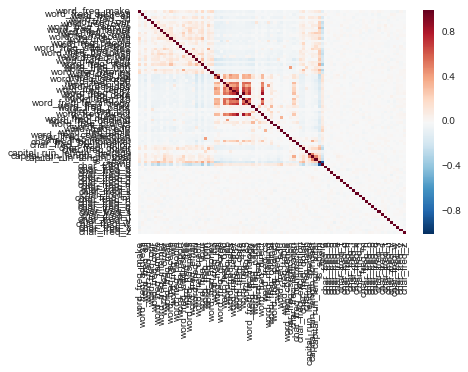

In [7]:
sns.heatmap(spam.corr())

In [8]:
spam.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all',
       u'word_freq_3d', u'word_freq_our', u'word_freq_over',
       u'word_freq_remove', u'word_freq_internet', u'word_freq_order',
       u'word_freq_mail', u'word_freq_receive', u'word_freq_will',
       u'word_freq_people', u'word_freq_report', u'word_freq_addresses',
       u'word_freq_free', u'word_freq_business', u'word_freq_email',
       u'word_freq_you', u'word_freq_credit', u'word_freq_your',
       u'word_freq_font', u'word_freq_000', u'word_freq_money',
       u'word_freq_hp', u'word_freq_hpl', u'word_freq_george',
       u'word_freq_650', u'word_freq_lab', u'word_freq_labs',
       u'word_freq_telnet', u'word_freq_857', u'word_freq_data',
       u'word_freq_415', u'word_freq_85', u'word_freq_technology',
       u'word_freq_1999', u'word_freq_parts', u'word_freq_pm',
       u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting',
       u'word_freq_original', u'word_freq_project', u'word_freq_re',
       u

In [9]:
spam.shape

(4601, 85)

In [10]:
spam_sub = spam[spam.columns[:-26]]
target = spam['is_spam']

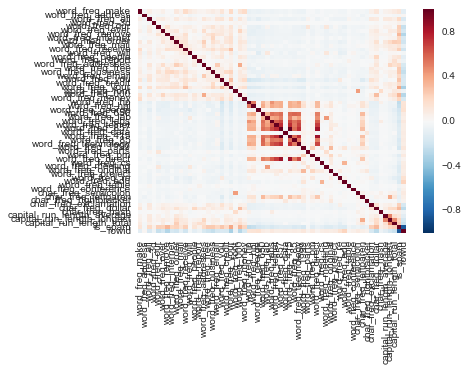

In [11]:
sns.heatmap(spam_sub.corr())

In [12]:
# Remove dataset from the 
col = [ x for x in spam_sub.columns if x != 'is_spam']

In [13]:
spam_sub = spam_sub[col]

In [14]:
spam_sub.ix[:, col] = (spam_sub.ix[:, col] - 
                       spam_sub.ix[:, col].mean()
                      )/spam.ix[:, col].std()

In [15]:
spam_sub.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342396           0.330849       0.712781     -0.046894   
1        0.345322           0.051904       0.435082     -0.046894   
2       -0.145906          -0.165054       0.851631     -0.046894   
3       -0.342396          -0.165054      -0.556700     -0.046894   
4       -0.342396          -0.165054      -0.556700     -0.046894   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011563       -0.350228         -0.291762           -0.262533   
1      -0.256089        0.672326          0.244717           -0.088001   
2       1.364698        0.343648          0.193623            0.036666   
3       0.472521       -0.350228          0.500183            1.308259   
4       0.472521       -0.350228          0.500183            1.308259   

   word_freq_order  word_freq_mail    ...     char_freq_semicolon  \
0        -0.323267       -0.371324    ...               -0.158436   
1        -0.323267        1.086593    ...               -0.158436   
2         1.973802        0.016420    ...               -0.117364   
3         0.789376        0.605791    ...               -0.158436   
4         0.789376        0.605791    ...               -0.158436   

   char_freq_leftparen  char_freq_rightbracket  char_freq_exclamation  \
0            -0.514251               -0.155181               0.623939   
1            -0.026004               -0.155181               0.126189   
2             0.014683               -0.155181               0.008495   
3            -0.007510               -0.155181              -0.161917   
4            -0.014908               -0.155181              -0.164369   

   char_freq_dollar  char_freq_hash  capital_run_length_average  \
0         -0.308321       -0.103037                   -0.045242   
1          0.423737        0.008762                   -0.002443   
2          0.440005       -0.079746                    0.145905   
3         -0.308321       -0.103037                   -0.052144   
4         -0.308321       -0.103037                   -0.052144   

   capital_run_length_longest  capital_run_length_total     rowid  
0                    0.045293                 -0.008723 -1.731486  
1                    0.250536                  1.228191 -1.730733  
2                    2.220865                  3.258378 -1.729981  
3                   -0.062459                 -0.152205 -1.729228  
4                   -0.062459                 -0.152205 -1.728475  

[5 rows x 58 columns]

In [16]:
logmodel = LogisticRegression()


# logspace structure:
# 0 , 5 : 0 -> 10** 5: 0, 10, 100, 1000, 10000
# , 20 : Place 20 points between each of those locations
Cs = 1.0/np.logspace(0, 4, 10)

search_parameters = {
    'penalty' :  ['l1','l2'],
    'C': Cs,
    'fit_intercept' : [False, True],
    'class_weight' : [None, 'balanced'],
    'n_jobs' : [4] # n_jobs means it is running that number of cores
    
}

est = GridSearchCV(logmodel, search_parameters)

In [17]:
X = spam_sub[[x for x in spam_sub.columns if x != 'is_spam']]
Y = target

In [18]:
grid = est.fit(X,Y)

In [19]:
grid.best_params_

{'C': 0.0059948425031894088,
 'class_weight': None,
 'fit_intercept': True,
 'n_jobs': 4,
 'penalty': 'l2'}

In [20]:
grid.grid_scores_

[mean: 0.87133, std: 0.13491, params: {'penalty': 'l1', 'C': 1.0, 'fit_intercept': False, 'n_jobs': 4, 'class_weight': None},
 mean: 0.92762, std: 0.06042, params: {'penalty': 'l2', 'C': 1.0, 'fit_intercept': False, 'n_jobs': 4, 'class_weight': None},
 mean: 0.84742, std: 0.12981, params: {'penalty': 'l1', 'C': 1.0, 'fit_intercept': True, 'n_jobs': 4, 'class_weight': None},
 mean: 0.93827, std: 0.05329, params: {'penalty': 'l2', 'C': 1.0, 'fit_intercept': True, 'n_jobs': 4, 'class_weight': None},
 mean: 0.87329, std: 0.13656, params: {'penalty': 'l1', 'C': 1.0, 'fit_intercept': False, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.92676, std: 0.06469, params: {'penalty': 'l2', 'C': 1.0, 'fit_intercept': False, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.85547, std: 0.13106, params: {'penalty': 'l1', 'C': 1.0, 'fit_intercept': True, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.93349, std: 0.06128, params: {'penalty': 'l2', 'C': 1.0, 'fit_intercept': True, 'n_jobs': 4, '

In [22]:
df = pd.DataFrame(grid.grid_scores_)

In [26]:
vars(grid.grid_scores_[0])
params

array([ 0.68338762,  0.99347684,  0.93737769])

In [27]:
grid.grid_scores_[0][0]['C']

1.0

In [34]:
df['C'] =  [row[0]['C'] for row in grid.grid_scores_]
df.head()

parameters  mean_validation_score  \
0  {u'penalty': u'l1', u'C': 1.0, u'fit_intercept...               0.871332   
1  {u'penalty': u'l2', u'C': 1.0, u'fit_intercept...               0.927624   
2  {u'penalty': u'l1', u'C': 1.0, u'fit_intercept...               0.847424   
3  {u'penalty': u'l2', u'C': 1.0, u'fit_intercept...               0.938274   
4  {u'penalty': u'l1', u'C': 1.0, u'fit_intercept...               0.873288   

                               cv_validation_scores    C  
0   [0.68338762215, 0.993476842792, 0.937377690802]  1.0  
1  [0.846254071661, 0.990867579909, 0.945857795173]  1.0  
2             [0.682736156352, 1.0, 0.859752120026]  1.0  
3  [0.869055374593, 0.998695368558, 0.947162426614]  1.0  
4  [0.682736156352, 0.995433789954, 0.941943900848]  1.0

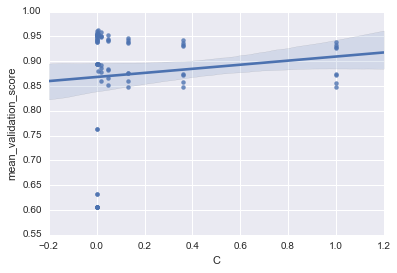

In [37]:
sns.regplot(y='mean_validation_score', x='C', data=df)
plt.show()

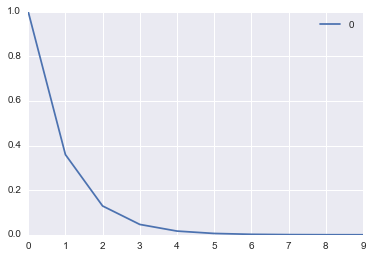

In [38]:
pd.DataFrame(Cs).plot()